# Introduction

Create "ground truth" OCR data using Gemini on the SROIE 2019 dataset.

In [1]:
from dotenv import load_dotenv
from PIL import Image
from google import genai
from google.genai import types
from tqdm.auto import tqdm

import time
import glob
import os

In [2]:
load_dotenv()

True

In [3]:
image_paths_list = [
    '../../input/sroie_v2/SROIE2019/train/img/*.jpg', # Train.
    '../../input/sroie_v2/SROIE2019/test/img/*.jpg' # Test
] 

In [4]:
sample = Image.open('../../input/sroie_v2/SROIE2019/train/img/X51005433552.jpg')

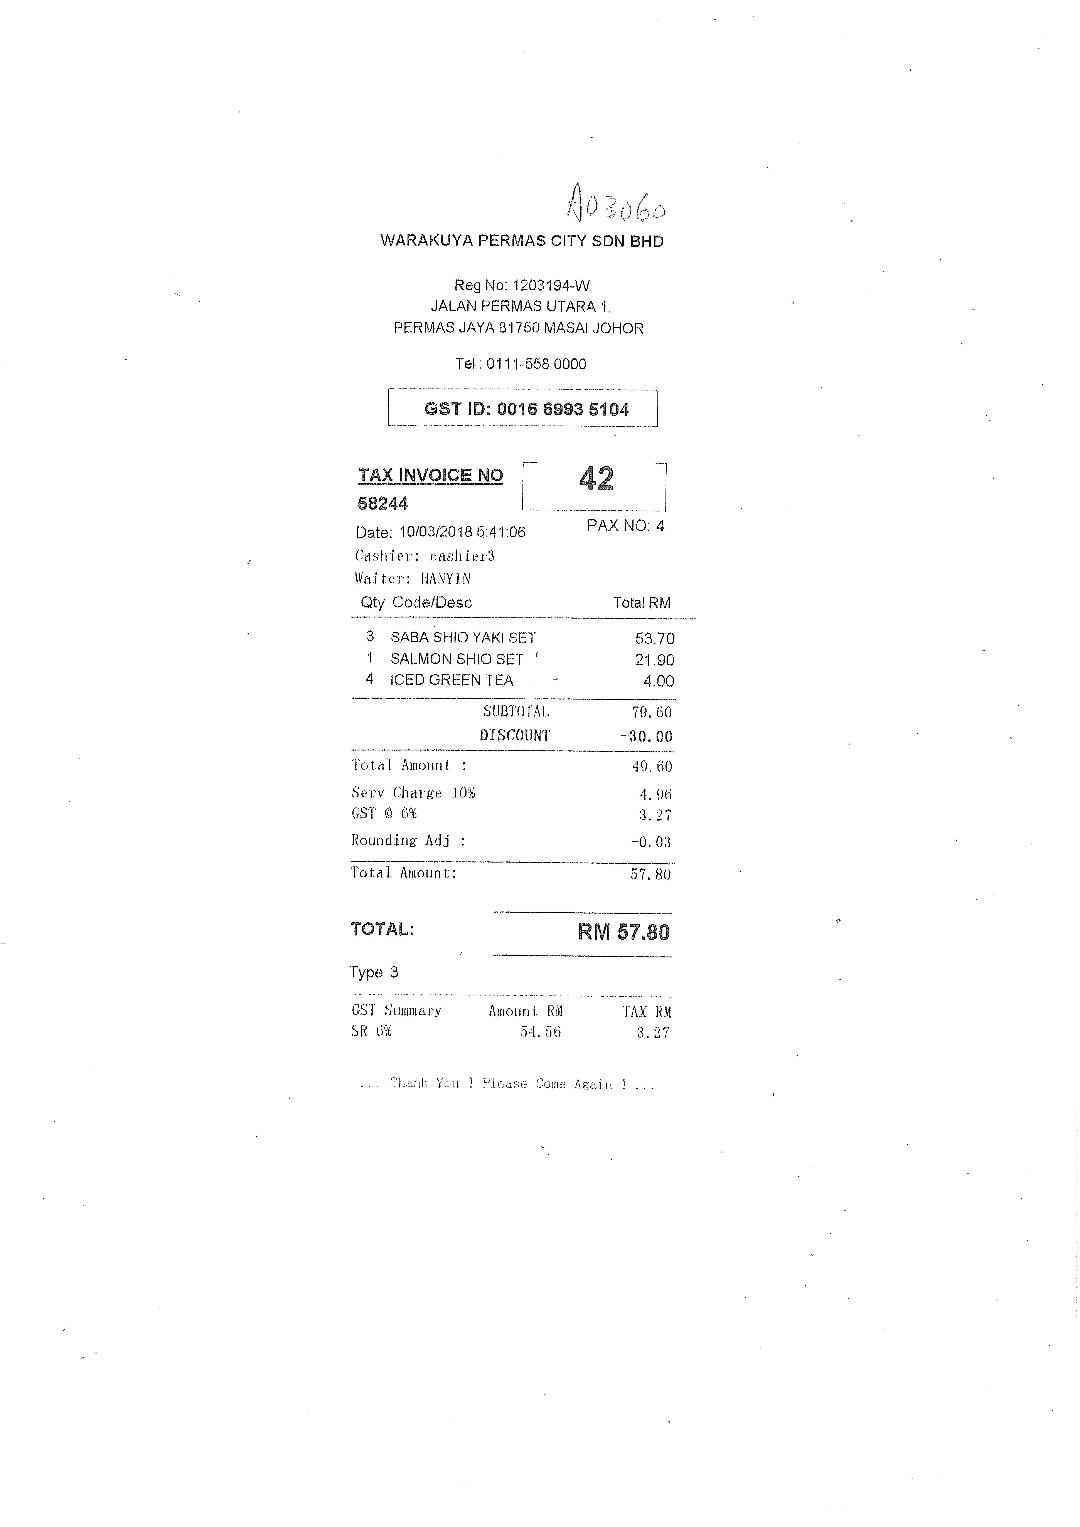

In [5]:
sample

In [6]:
# Sample call.
client = genai.Client(api_key=os.getenv('GEMINI_API'))
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["OCR this image. Do not give any other content", sample]
)

In [7]:
print(response)
print('#'*50)
print(response.text)

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text='A03060\nWARAKUYA PERMAS CITY SDN BHD\nReg No: 1203194-W\nJALAN PERMAS UTARA 1.\nPERMAS JAYA 81750 MASAI JOHOR\nTel: 0111-558 0000\nGST ID: 0016 6993 5104\nTAX INVOICE NO\n58244\nDate: 10/03/2018 5:41:06\nCashier: cashier3\nWaiter: HANYIN\nQty Code/Desc\n3 SABA SHIO YAKI SET\n1 SALMON SHIO SET\n4 ICED GREEN TEA\n42\nPAX NO: 4\nTotal RM\n53.70\n21.90\n4.00\nSUBTOTAL\n79,60\nDISCOUNT\n-30.00\nTotal Amount:\n49.60\nServ Charge 10%\nGST © 6%\n4.96\n3.27\nRounding Adj:\nTotal Amount:\n-0.03\n57.80\nTOTAL:\nType 3\nRM 57.80\nGST Summary\nSR 6%\nAmouni Ril\n54.56\nTAX RM\n3.27\nThank You! Please Come Again!')], role='model'), citation_metadata=None, finish_message=None, token_count=None, finish_reason=<FinishReason.STOP: 'STOP'>, avg_logprobs=-0.007724906527806842, grounding_met

In [8]:
out_dir_list = [
    '../../input/gemini_annots/gemini_ocr_result_sroiev2_train', #Train
    '../../input/gemini_annots/gemini_ocr_result_sroiev2_test' # Test
]

In [9]:
for image_path_split, out_dir in zip(image_paths_list, out_dir_list):
    all_images = glob.glob(image_path_split)
    os.makedirs(out_dir, exist_ok=True)
    
    for image_path in tqdm(all_images, total=len(all_images)):
        image = Image.open(image_path)
    
        response = client.models.generate_content(
            model='gemini-2.0-flash',
            contents=['OCR this image. Do not give any other content', image]
        )
    
        with open(os.path.join(out_dir, image_path.split(os.path.sep)[-1].split('.jpg')[0]+'.txt'), 'w') as f:
            f.write(response.text)
    
        time.sleep(10)

  0%|          | 0/626 [00:00<?, ?it/s]

KeyboardInterrupt: 